# knn implementation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
import os
os.chdir('C:\csv files')
data=pd.read_csv('diamonds.csv')


In [3]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
data = data.reindex(columns=['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'price'])
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757


In [6]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [7]:
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
None
(53940, 10)


In [8]:
data.duplicated().sum()

146

In [9]:
data= data.drop_duplicates()

In [10]:
data.duplicated().sum()

0

In [11]:
data.describe()

,carat,depth,table,x,y,z,price
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,5.731214,5.734653,3.538714,3933.065082
std,0.47339,1.429909,2.233679,1.120695,1.141209,0.705037,3988.114460
min,0.20000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.40000,61.000000,56.000000,4.710000,4.720000,2.910000,951.000000
50%,0.70000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.04000,62.500000,59.000000,6.540000,6.540000,4.030000,5326.750000
max,5.01000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


<AxesSubplot:>

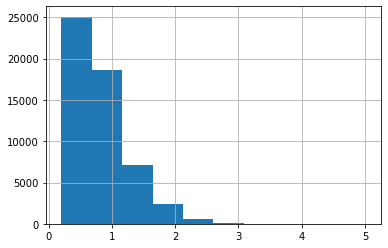

In [13]:
data['carat'].hist()

<AxesSubplot:>

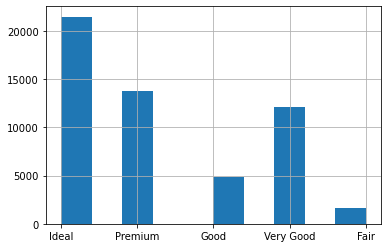

In [14]:
data['cut'].hist()

<AxesSubplot:>

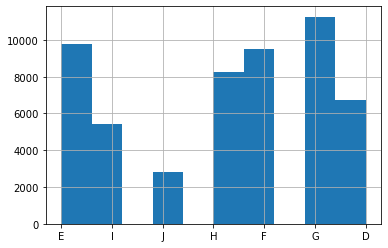

In [15]:
data['color'].hist()

<AxesSubplot:>

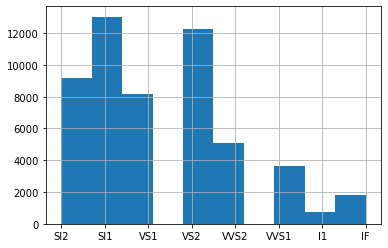

In [16]:
data['clarity'].hist()

<AxesSubplot:>

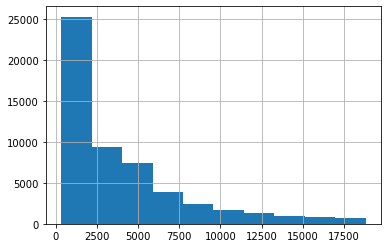

In [17]:
data['price'].hist()

<AxesSubplot:>

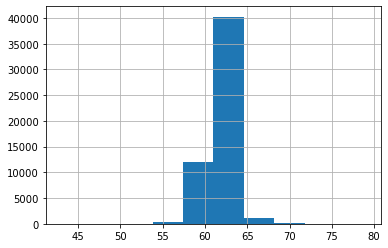

In [18]:
data['depth'].hist()

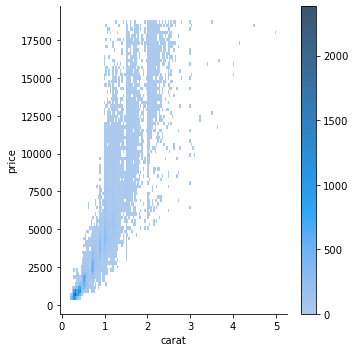

In [19]:
#bivariate analysis
sns.displot(data=data, x='carat', y='price', cbar=True)

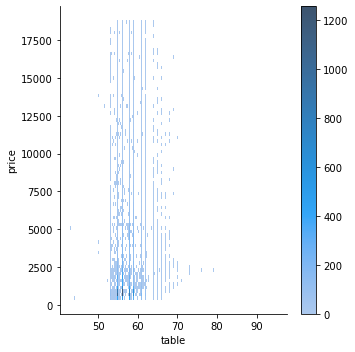

In [20]:
sns.displot(data=data, x='table', y='price',cbar=True)

In [21]:
# all numeric (float and int) variables in the dataset
df_numeric = data.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,carat,depth,table,x,y,z,price
0,0.23,61.5,55.0,3.95,3.98,2.43,326
1,0.21,59.8,61.0,3.89,3.84,2.31,326
2,0.23,56.9,65.0,4.05,4.07,2.31,327
3,0.29,62.4,58.0,4.20,4.23,2.63,334
4,0.31,63.3,58.0,4.34,4.35,2.75,335


<Figure size 1080x720 with 0 Axes>

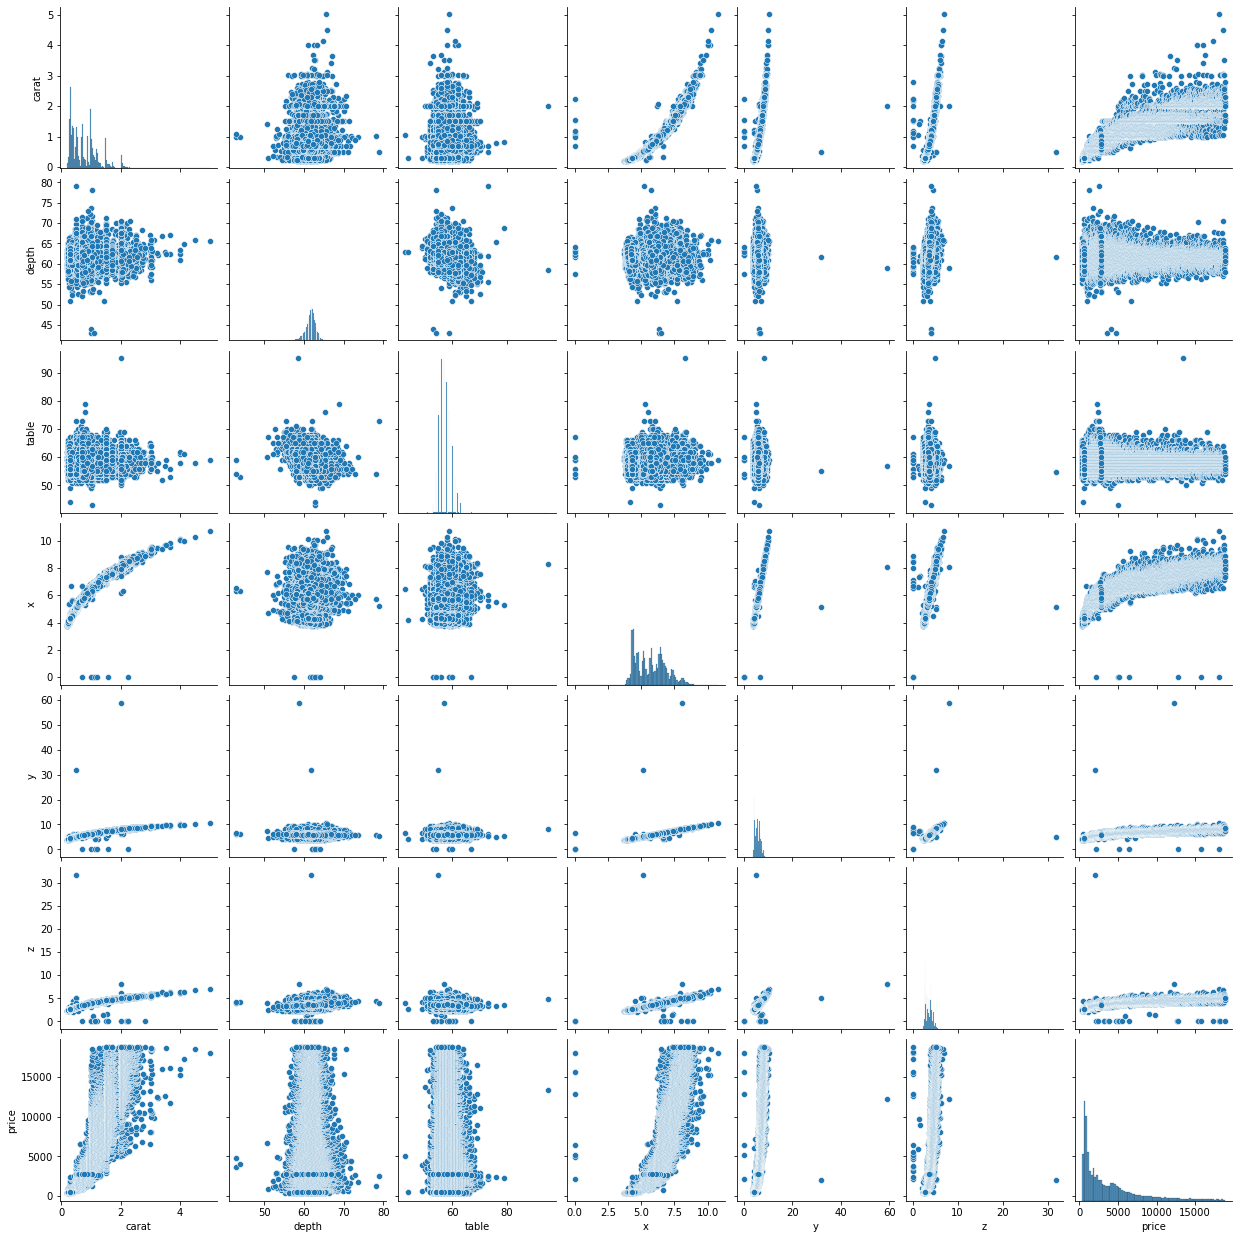

In [23]:
plt.figure(figsize=(15, 10))
sns.pairplot(df_numeric)
plt.show()

In [24]:
corr=df_numeric.corr()

In [25]:
corr

,carat,depth,table,x,y,z,price
carat,1.000000,0.027861,0.181091,0.975380,0.951908,0.953542,0.921548
depth,0.027861,1.000000,-0.297669,-0.025348,-0.029389,0.094757,-0.011048
table,0.181091,-0.297669,1.000000,0.194855,0.183231,0.150270,0.126566
x,0.975380,-0.025348,0.194855,1.000000,0.974592,0.970686,0.884504
y,0.951908,-0.029389,0.183231,0.974592,1.000000,0.951844,0.865395
z,0.953542,0.094757,0.150270,0.970686,0.951844,1.000000,0.861208
price,0.921548,-0.011048,0.126566,0.884504,0.865395,0.861208,1.000000


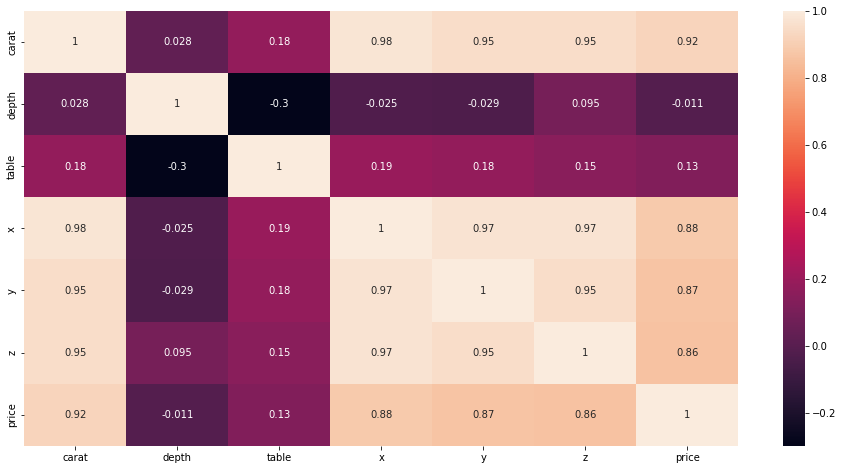

In [26]:
plt.figure(figsize=(16,8))


sns.heatmap(corr, annot=True)
plt.show()

In [28]:
# Identifying the inputs(x) and output(y)

x = data[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
y = data['price']

In [29]:
# split into train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.75, random_state= 0)

In [30]:
x_train

,carat,cut,color,clarity,depth,table,x,y,z
38685,0.30,Ideal,F,VVS1,61.1,55.0,4.36,4.38,2.67
6026,1.00,Very Good,D,SI2,63.2,56.0,6.38,6.33,4.02
26499,2.01,Very Good,H,SI2,63.4,57.0,8.00,7.93,5.05
28444,0.31,Ideal,G,VVS2,61.5,57.0,4.32,4.36,2.67
16616,1.21,Premium,H,SI1,60.2,58.0,6.93,6.88,4.16
...,...,...,...,...,...,...,...,...,...
46028,0.57,Premium,I,VVS1,62.1,58.0,5.32,5.25,3.28
52561,0.70,Ideal,G,VS2,62.1,57.0,5.66,5.70,3.53
42745,0.51,Good,E,SI1,63.5,54.0,5.07,5.10,3.23
43704,0.58,Ideal,D,SI2,61.2,57.0,5.38,5.41,3.30


In [32]:
y_train

38685     1041
6026      3965
26499    16111
28444      671
16616     6640
         ...  
46028     1728
52561     2536
42745     1343
43704     1436
2738      3247
Name: price, Length: 40345, dtype: int64

In [33]:
x_test

,carat,cut,color,clarity,depth,table,x,y,z
28297,0.24,Ideal,I,VVS1,62.3,57.0,3.98,3.95,2.47
17356,1.01,Ideal,G,VS2,62.6,56.0,6.41,6.44,4.02
48882,0.73,Premium,J,VS1,60.2,58.0,5.87,5.82,3.52
19901,1.05,Ideal,D,VS2,61.0,56.0,6.54,6.61,4.01
44377,0.52,Very Good,G,VS1,61.8,58.0,5.19,5.16,3.20
...,...,...,...,...,...,...,...,...,...
23346,0.30,Ideal,G,SI2,61.9,57.0,4.28,4.31,2.66
25751,1.52,Ideal,G,VS2,61.4,56.0,7.39,7.47,4.56
9447,1.02,Very Good,F,SI1,63.0,58.0,6.36,6.40,4.02
13489,1.16,Very Good,H,VS2,63.0,57.0,6.64,6.66,4.19


In [34]:
y_test

28297      432
17356     6964
48882     2037
19901     8451
44377     1581
         ...  
23346      422
25751    14692
9447      4594
13489     5537
42434     1314
Name: price, Length: 13449, dtype: int64

In [35]:
x_train.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

In [38]:
# separating train categorical column
x_train_cat = x_train.select_dtypes(include=['object'])
x_train_cat

,cut,color,clarity
38685,Ideal,F,VVS1
6026,Very Good,D,SI2
26499,Very Good,H,SI2
28444,Ideal,G,VVS2
16616,Premium,H,SI1
...,...,...,...
46028,Premium,I,VVS1
52561,Ideal,G,VS2
42745,Good,E,SI1
43704,Ideal,D,SI2


In [39]:
# separating train numerical column
x_train_num = x_train.select_dtypes(include=['int64', 'float64'])
x_train_num

,carat,depth,table,x,y,z
38685,0.30,61.1,55.0,4.36,4.38,2.67
6026,1.00,63.2,56.0,6.38,6.33,4.02
26499,2.01,63.4,57.0,8.00,7.93,5.05
28444,0.31,61.5,57.0,4.32,4.36,2.67
16616,1.21,60.2,58.0,6.93,6.88,4.16
...,...,...,...,...,...,...
46028,0.57,62.1,58.0,5.32,5.25,3.28
52561,0.70,62.1,57.0,5.66,5.70,3.53
42745,0.51,63.5,54.0,5.07,5.10,3.23
43704,0.58,61.2,57.0,5.38,5.41,3.30


In [40]:
x_train_cat['cut'].value_counts(normalize=True)
    

Ideal        0.399058
Premium      0.256959
Very Good    0.223720
Good         0.090767
Fair         0.029496
Name: cut, dtype: float64

In [41]:
x_train_cat['color'].value_counts(normalize=True)
    

G    0.208750
E    0.182104
F    0.177122
H    0.153402
D    0.126410
I    0.100706
J    0.051506
Name: color, dtype: float64

In [42]:
x_train_cat['clarity'].value_counts(normalize=True)

SI1     0.242756
VS2     0.229248
SI2     0.168819
VS1     0.150675
VVS2    0.094659
VVS1    0.067171
IF      0.032891
I1      0.013781
Name: clarity, dtype: float64

In [43]:
x_train_cat_le = pd.DataFrame(index= x_train_cat.index)
x_train_cat_le.head()

""
38685
6026
26499
28444
16616


In [44]:
x_train_cat.cut.unique()


array(['Ideal', 'Very Good', 'Premium', 'Fair', 'Good'], dtype=object)

In [45]:
cut_encoder = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Ideal' : 4, 'Premium' : 5}

x_train_cat_le['cut'] = x_train_cat['cut'].apply(lambda k : cut_encoder[k])
x_train_cat_le

,cut
38685,4
6026,3
26499,3
28444,4
16616,5
...,...
46028,5
52561,4
42745,2
43704,4


In [46]:
x_train_cat.color.unique()

array(['F', 'D', 'H', 'G', 'I', 'E', 'J'], dtype=object)

In [47]:
color_encoder = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}

x_train_cat_le['color'] = x_train_cat['color'].apply(lambda z : color_encoder[z])
x_train_cat_le

,cut,color
38685,4,5
6026,3,7
26499,3,3
28444,4,4
16616,5,3
...,...,...
46028,5,2
52561,4,4
42745,2,6
43704,4,7


In [48]:
x_train_cat.clarity.unique()

array(['VVS1', 'SI2', 'VVS2', 'SI1', 'I1', 'VS2', 'IF', 'VS1'],
      dtype=object)

In [49]:
clarity_encoder = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

x_train_cat_le['clarity'] = x_train_cat['clarity'].apply(lambda z : clarity_encoder[z])
x_train_cat_le.head()

,cut,color,clarity
38685,4,5,7
6026,3,7,2
26499,3,3,2
28444,4,4,6
16616,5,3,3


In [50]:
x_train_num.head()

,carat,depth,table,x,y,z
38685,0.30,61.1,55.0,4.36,4.38,2.67
6026,1.00,63.2,56.0,6.38,6.33,4.02
26499,2.01,63.4,57.0,8.00,7.93,5.05
28444,0.31,61.5,57.0,4.32,4.36,2.67
16616,1.21,60.2,58.0,6.93,6.88,4.16


In [51]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_num_rescaled = pd.DataFrame(scaler.fit_transform(x_train_num), 
                                    columns = x_train_num.columns, 
                                    index = x_train_num.index)

x_train_num_rescaled.head()

,carat,depth,table,x,y,z
38685,-1.051952,-0.455192,-1.107077,-1.224342,-1.177979,-1.250507
6026,0.429781,1.015185,-0.657431,0.581138,0.518920,0.695929
26499,2.567710,1.155221,-0.207785,2.029097,1.911248,2.180987
28444,-1.030784,-0.175120,-0.207785,-1.260094,-1.195383,-1.250507
16616,0.874301,-1.085354,0.241860,1.072729,0.997533,0.897781


In [52]:
x_train_transformed = pd.concat([x_train_num_rescaled, x_train_cat_le], axis=1)
x_train_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
38685,-1.051952,-0.455192,-1.107077,-1.224342,-1.177979,-1.250507,4,5,7
6026,0.429781,1.015185,-0.657431,0.581138,0.518920,0.695929,3,7,2
26499,2.567710,1.155221,-0.207785,2.029097,1.911248,2.180987,3,3,2
28444,-1.030784,-0.175120,-0.207785,-1.260094,-1.195383,-1.250507,4,4,6
16616,0.874301,-1.085354,0.241860,1.072729,0.997533,0.897781,5,3,3


In [53]:
x_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
28297,0.24,Ideal,I,VVS1,62.3,57.0,3.98,3.95,2.47
17356,1.01,Ideal,G,VS2,62.6,56.0,6.41,6.44,4.02
48882,0.73,Premium,J,VS1,60.2,58.0,5.87,5.82,3.52
19901,1.05,Ideal,D,VS2,61.0,56.0,6.54,6.61,4.01
44377,0.52,Very Good,G,VS1,61.8,58.0,5.19,5.16,3.20


In [54]:
x_test_cat = x_test.select_dtypes(include=['object'])
x_test_cat

,cut,color,clarity
28297,Ideal,I,VVS1
17356,Ideal,G,VS2
48882,Premium,J,VS1
19901,Ideal,D,VS2
44377,Very Good,G,VS1
...,...,...,...
23346,Ideal,G,SI2
25751,Ideal,G,VS2
9447,Very Good,F,SI1
13489,Very Good,H,VS2


In [55]:
x_test_num = x_test.select_dtypes(include=['int64', 'float64'])
x_test_num.head()

,carat,depth,table,x,y,z
28297,0.24,62.3,57.0,3.98,3.95,2.47
17356,1.01,62.6,56.0,6.41,6.44,4.02
48882,0.73,60.2,58.0,5.87,5.82,3.52
19901,1.05,61.0,56.0,6.54,6.61,4.01
44377,0.52,61.8,58.0,5.19,5.16,3.20


In [56]:
x_test_num_rescaled = pd.DataFrame(scaler.transform(x_test_num), 
                                   columns = x_test_num.columns, 
                                   index = x_test_num.index)

x_test_num_rescaled.head()

,carat,depth,table,x,y,z
28297,-1.178958,0.385023,-0.207785,-1.563987,-1.552167,-1.538867
17356,0.450949,0.595077,-0.657431,0.607952,0.614643,0.695929
48882,-0.141745,-1.085354,0.241860,0.125299,0.075116,-0.024973
19901,0.535619,-0.525210,-0.657431,0.724146,0.762578,0.681511
44377,-0.586264,0.034934,0.241860,-0.482487,-0.499219,-0.486350


In [57]:
x_test_cat_le = pd.DataFrame(index = x_test_cat.index)
x_test_cat_le.head()

""
28297
17356
48882
19901
44377


In [58]:
x_test_cat_le['cut'] = x_test_cat['cut'].apply(lambda z : cut_encoder[z])
x_test_cat_le['color'] = x_test_cat['color'].apply(lambda z : color_encoder[z])
x_test_cat_le['clarity'] = x_test_cat['clarity'].apply(lambda z: clarity_encoder[z])

x_test_cat_le.head()

,cut,color,clarity
28297,4,2,7
17356,4,4,4
48882,5,1,5
19901,4,7,4
44377,3,4,5


In [59]:
x_test_transformed = pd.concat([x_test_num_rescaled, x_test_cat_le], axis=1)
x_test_transformed

,carat,depth,table,x,y,z,cut,color,clarity
28297,-1.178958,0.385023,-0.207785,-1.563987,-1.552167,-1.538867,4,2,7
17356,0.450949,0.595077,-0.657431,0.607952,0.614643,0.695929,4,4,4
48882,-0.141745,-1.085354,0.241860,0.125299,0.075116,-0.024973,5,1,5
19901,0.535619,-0.525210,-0.657431,0.724146,0.762578,0.681511,4,7,4
44377,-0.586264,0.034934,0.241860,-0.482487,-0.499219,-0.486350,3,4,5
...,...,...,...,...,...,...,...,...,...
23346,-1.051952,0.104951,-0.207785,-1.295847,-1.238894,-1.264925,4,4,2
25751,1.530497,-0.245138,-0.657431,1.483878,1.510954,1.474503,4,4,4
9447,0.472116,0.875149,0.241860,0.563262,0.579835,0.695929,3,5,3
13489,0.768463,0.875149,-0.207785,0.813526,0.806088,0.941035,3,3,4


In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_new = pd.DataFrame(scaler.fit_transform(x_train_transformed),columns = x_train_transformed.columns,index = x_train_transformed.index)
x_train_new.head()

,carat,depth,table,x,y,z,cut,color,clarity
38685,-1.051952,-0.455192,-1.107077,-1.224342,-1.177979,-1.250507,0.230731,0.346103,1.794657
6026,0.429781,1.015185,-0.657431,0.581138,0.518920,0.695929,-0.743712,1.521781,-1.248509
26499,2.567710,1.155221,-0.207785,2.029097,1.911248,2.180987,-0.743712,-0.829575,-1.248509
28444,-1.030784,-0.175120,-0.207785,-1.260094,-1.195383,-1.250507,0.230731,-0.241736,1.186024
16616,0.874301,-1.085354,0.241860,1.072729,0.997533,0.897781,1.205175,-0.829575,-0.639876


In [61]:
x_test_new = pd.DataFrame(scaler.fit_transform(x_test_transformed),columns = x_test_transformed.columns,index = x_test_transformed.index)
x_test_new.head()

,carat,depth,table,x,y,z,cut,color,clarity
28297,-1.176305,0.388869,-0.197182,-1.558624,-1.600353,-1.453165,0.242145,-1.405551,1.776780
17356,0.440447,0.597937,-0.639186,0.598959,0.628860,0.646213,0.242145,-0.229683,-0.032374
48882,-0.147463,-1.074606,0.244823,0.119496,0.073795,-0.031005,1.216009,-1.993485,0.570677
19901,0.524434,-0.517091,-0.639186,0.714386,0.781055,0.632669,0.242145,1.534119,-0.032374
44377,-0.588395,0.040423,0.244823,-0.484272,-0.517081,-0.464425,-0.731720,-0.229683,0.570677


In [62]:
print("X_train:",x_train_new.shape,"\nX_test:" ,x_test_new.shape,"\nY_train:",y_train.shape,"\nY_test:",y_test.shape)

X_train: (40345, 9) 
X_test: (13449, 9) 
Y_train: (40345,) 
Y_test: (13449,)


# data modelling 

In [64]:
class knn_regressor:
    def __init__(self,k):
        self.k=k
    def fit_function(self,x,y):
        self.x=np.asarray(x)
        self.y=np.asarray(y)
        
    def predict_function(self,x):
        x=np.asarray(x)
        predict=[]
        for i in x:
            distance = np.sqrt(np.sum((i-self.x)**2,axis=1))
            sort_value = distance.argsort()
            sort_value = sort_value[:self.k]
            predict.append(np.mean(self.y[sort_value]))
        return np.array(predict)
    
model = knn_regressor(k = 5)
model.fit_function(x_train_new,y_train)
y_pred_knn = model.predict_function(x_test_new)
y_pred_knn

array([ 584.8, 6158. , 2235.8, ..., 5093. , 5977.4, 1358.4])

In [65]:
from sklearn import metrics
scratch_accu = metrics.r2_score(y_test,y_pred_knn)
scratch_accu

0.9640474369420065

In [66]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred_knn))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred_knn))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))

Mean Absolute Error:  379.838144099933
Mean Squared Error:  573047.677037698
Root Mean Squared Error:  756.9991261802737


# KNN using sklearn

In [67]:

from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(x_train_new, y_train)


KNeighborsRegressor()

In [68]:
y_test_pred = regressor.predict(x_test_new)
sns_accu = metrics.r2_score(y_test,y_test_pred)
sns_accu

0.9640472945049022

In [69]:

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  379.85424938657155
Mean Squared Error:  573049.9473418099
Root Mean Squared Error:  757.0006257208839
